# Confusion Matrix

## Tasks

### Task 1

Import data you need to solve tasks for this lesson. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("processed_train.csv")

In [3]:
data.head() 

,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,...,Platform_windows8,Processor_x64,Processor_x86,Census_DeviceFamily_Windows.Server,Census_OSArchitecture_arm64,Census_OSArchitecture_x86,Census_GenuineStateName_IS_GENUINE,Census_GenuineStateName_OFFLINE,Census_GenuineStateName_UNKNOWN,HasDetections
0,0.552153,0.530941,0.587952,7.0,0,53447.0,1.0,1.0,1,29,...,0,1,0,0,0,0,1,0,0,0
1,0.448751,0.528931,0.484434,7.0,0,53447.0,1.0,1.0,1,93,...,0,1,0,0,0,0,0,1,0,0
2,0.552153,0.530941,0.557522,7.0,0,53447.0,1.0,1.0,1,86,...,0,1,0,0,0,0,1,0,0,0
3,0.552153,0.530941,0.482759,7.0,0,53447.0,1.0,1.0,1,97,...,0,1,0,0,0,0,1,0,0,0
4,0.493175,0.530941,0.505721,7.0,0,53447.0,1.0,1.0,1,164,...,0,1,0,0,0,0,1,0,0,0


In [4]:
data.shape

(119952, 79)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119952 entries, 0 to 119951
Data columns (total 79 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   EngineVersion                                      119952 non-null  float64
 1   AppVersion                                         119952 non-null  float64
 2   AvSigVersion                                       119952 non-null  float64
 3   RtpStateBitfield                                   119952 non-null  float64
 4   IsSxsPassiveMode                                   119952 non-null  int64  
 5   AVProductStatesIdentifier                          119952 non-null  float64
 6   AVProductsInstalled                                119952 non-null  float64
 7   AVProductsEnabled                                  119952 non-null  float64
 8   HasTpm                                             119952 non-null  int64 

### Task 2

Check target class balance.

In [6]:
print(sum(data['HasDetections'] == 1), '- positive class,')
print(sum(data['HasDetections'] == 0), '- negative class')

20012 - positive class,
99940 - negative class


### Task 3

Split data on train and test samples.

In [7]:
y = data['HasDetections']
X = data.drop('HasDetections', axis=1)

In [8]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.25, 
                                                     shuffle=True, 
                                                     random_state=1)

### Task 4

Fit a logistic regression using cross_validation and check `accuracy` metric on both train and test samples.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression


pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l2', C=0.01))
])

cv = [(X_train.index.to_list(), X_test.index.to_list())]

result = cross_validate(pipe, X, y, scoring='accuracy', cv=cv, return_train_score=True)

In [10]:
print(f'Train Accuracy: {result["train_score"][0]:.7f}')

Train Accuracy: 0.8411920


In [11]:
print(f'Test Accuracy: {result["test_score"][0]:.7f}')

Test Accuracy: 0.8421035


### Task 5

Calculate the number of TN, FP, FN, TP predictions of your model.

In [12]:
pipe.fit(X_train, y_train)
pred_test = pipe.predict(X_test)

In [13]:
TN = ((pred_test == 0) & (y_test.values == 0)).sum()
FP = ((pred_test == 1) & (y_test.values == 0)).sum()
FN = ((pred_test == 0) & (y_test.values == 1)).sum()
TP = ((pred_test == 1) & (y_test.values == 1)).sum()

print(f'True Negative = {TN}, False Positive = {FP}, False Negative = {FN}, True Positive = {TP}')

True Negative = 24726, False Positive = 293, False Negative = 4442, True Positive = 527


In [14]:
from sklearn.metrics import confusion_matrix


TN, FP, FN, TP = confusion_matrix(y_test, pred_test).ravel()

print(f'True Negative = {TN}, False Positive = {FP}, False Negative = {FN}, True Positive = {TP}')

True Negative = 24726, False Positive = 293, False Negative = 4442, True Positive = 527


### Task 6

Plot a confusion matrix using these values.

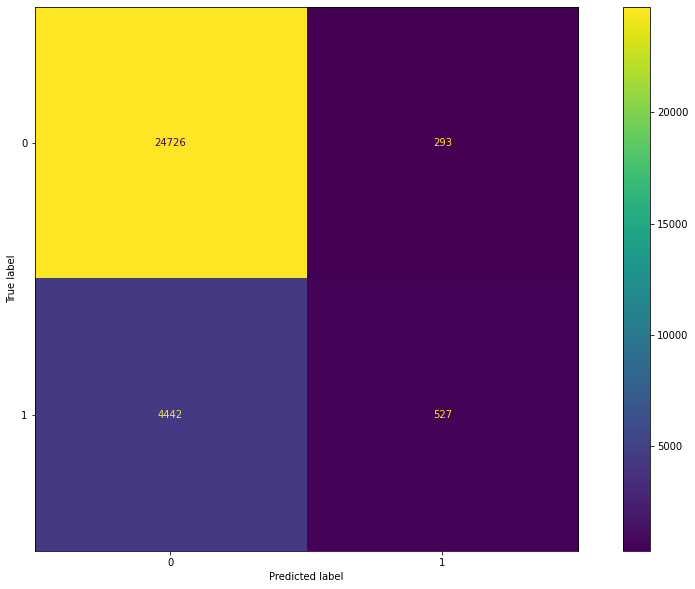

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, pred_test, labels=pipe.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(16, 10))
cmp.plot(ax=ax)
plt.show()

### Task 7

Calculate `Accuaracy` using a formula:
$$
Accuracy=\frac{TP+TN}{TP+TN+FP+FN}
$$

In [16]:
acc = (TP + TN) / (TP + TN + FN + FP)

print(f'Test Accuracy: {acc:.7f}')

Test Accuracy: 0.8421035


### Task 8. 

Calculate `Precision` using a formula:
$$
Precision = \frac{TP}{TP+FP}
$$

In [17]:
precision = TP / (TP + FP)

print(f'Test Precision: {precision:.7f}')

Test Precision: 0.6426829


### Task 9. 

Calculate `Recall` using a formula:
$$
Recall = \frac{TP}{TP+FN}
$$

In [18]:
recall = TP / (TP + FN)

print(f'Test Recall: {recall:.7f}')

Test Recall: 0.1060576


### Task 10. 

Do the same using in-built sklearn tools.

In [19]:
from sklearn.metrics import precision_score, recall_score


print(f'Test Precision: {precision_score(y_test, pred_test):.7f}')
print(f'Test Recall: {recall_score(y_test, pred_test):.7f}')

Test Precision: 0.6426829
Test Recall: 0.1060576


### Task 11. 

Check `precision` and `recall` metrics using `predict_proba` metric using a standard threshold = 0.5.

In [20]:
pipe.fit(X_train, y_train)
pred_proba_test = pipe.predict_proba(X_test)

threshold = 0.5
preds_binary = [0 if x[0] > threshold else 1 for x in pred_proba_test.tolist()]

print(f'Test Precision: {precision_score(y_test, preds_binary):.7f}')
print(f'Test Recall: {recall_score(y_test, preds_binary):.7f}')

Test Precision: 0.6426829
Test Recall: 0.1060576


### Task 12.

Find a treshold value to optimize for `recall` while having `precision` > 0.6

In [21]:
from sklearn.metrics import precision_recall_curve


# building all possible combinations of precision, recall, threshold
precision, recall, thres = precision_recall_curve(y_test, pred_proba_test[:, 1])

# Finding such values to maximize recall having precision > 0.6
ind = np.where(recall == recall[precision > 0.6].max())

print(f'Precison:\t {precision[ind][-1]}')
print(f'Recall: \t {recall[ind][-1]}')
print(f'Threshold:\t {thres[ind][-1]}')

Precison:	 0.6003717472118959
Recall: 	 0.1300060374320789
Threshold:	 0.4576697044816946


### Task 13.

Find a treshold value to optimize for `precision` while having `recall` > 0.2

In [22]:
ind = np.where(precision == precision[recall > 0.2].max())

print(f'Precison:\t {precision[ind][-1]}')
print(f'Recall: \t {recall[ind][-1]}')
print(f'Threshold:\t {thres[ind][-1]}')

Precison:	 0.4923229321446261
Recall: 	 0.2000402495471926
Threshold:	 0.33074936212548517


### Task 14. 

Now lets try to use another approach to find the best threshold level to maximize for `precision` and `recall`.

In [23]:
def level_lines(func, name):
    x = np.linspace(0, 1.1, 100)
    y = np.linspace(0, 1.1, 100)
    
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)
    
    plt.figure(figsize=(5, 5))
    plt.title(name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.contour(X, Y, Z, 15, cmap='plasma');

At first we will try to use an arithmetic average:
$$
Arithm_{avg} = \dfrac{P + R}{2}
$$

Precision:	 0.16995681677976557
Recall: 	 0.9979875226403703
Threshold:	 0.02198734808659953


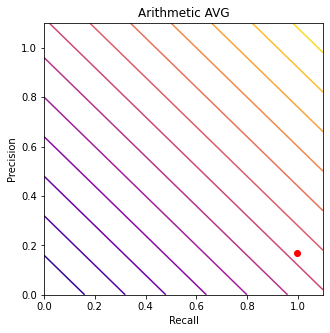

In [24]:
metric_func = lambda x, y: (x + y)/2

arithm_idx = (metric_func(precision, recall)).argmax()

print(f'Precision:\t {precision[arithm_idx]}')
print(f'Recall: \t {recall[arithm_idx]}')
print(f'Threshold:\t {thres[arithm_idx]}')

level_lines(metric_func, 'Arithmetic AVG')
plt.plot(recall[arithm_idx], precision[arithm_idx], 'ro');

### Task 15. 

Now let's try to use a geometric average:
$$
\quad Geom_{avg} = \sqrt{P \cdot R}
$$

Precision:	 0.22336008856905618
Recall: 	 0.8120346146105857
Threshold:	 0.12529268151846584


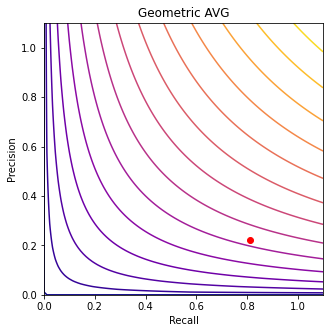

In [25]:
metric_func = lambda x, y: (x * y)**.5

geom_idx = (metric_func(precision, recall)).argmax()

print(f'Precision:\t {precision[geom_idx]}')
print(f'Recall: \t {recall[geom_idx]}')
print(f'Threshold:\t {thres[geom_idx]}')

level_lines(metric_func, 'Geometric AVG')
plt.plot(recall[geom_idx], precision[geom_idx], 'ro');

### Task 16. 

And let's try to use a minimum:
$$
\quad Min = \min(P, R)
$$

Precision:	 0.35882471322197623
Recall: 	 0.35882471322197623
Threshold:	 0.2367492711112012


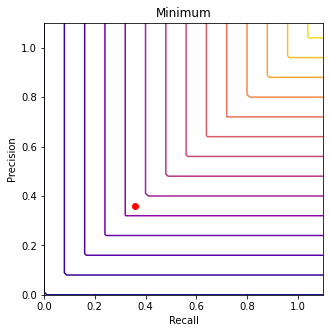

In [26]:
metric_func = lambda x, y: np.minimum(x, y)

min_idx = (metric_func(precision, recall)).argmax()

print(f'Precision:\t {precision[min_idx]}')
print(f'Recall: \t {recall[min_idx]}')
print(f'Threshold:\t {thres[min_idx]}')

level_lines(metric_func, 'Minimum')
plt.plot(recall[min_idx], precision[min_idx], 'ro');

### Task 17. 

Let's try to use `F-score` with different $beta^2$ values:
$$
F = \dfrac{(1 + \beta^2) P \cdot R}{\beta^2 P + R}
$$

$beta^2=1$

Precision:	 0.2849339014530755
Recall: 	 0.5248540953914268
Threshold:	 0.19234955640590176
F-score: 	 0.3693527828919416


/tmp/ipykernel_125/1393857507.py:1: RuntimeWarning: invalid value encountered in true_divide
  metric_func = lambda x, y: ((1+1) * x * y) / (1 * x + y)


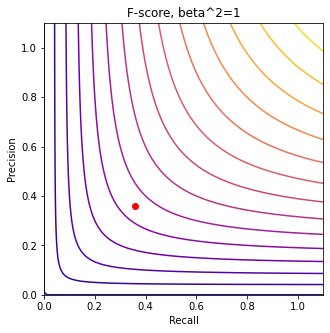

In [27]:
metric_func = lambda x, y: ((1+1) * x * y) / (1 * x + y)

f_idx = (metric_func(precision, recall)).argmax()

print(f'Precision:\t {precision[f_idx]}')
print(f'Recall: \t {recall[f_idx]}')
print(f'Threshold:\t {thres[f_idx]}')
print(f'F-score: \t {metric_func(precision, recall)[f_idx]}')

level_lines(metric_func, 'F-score, beta^2=1')
plt.plot(recall[min_idx], precision[min_idx], 'ro');

### Task 18. 

$beta^2=0.05$

Precision:	 0.6422668240850059
Recall: 	 0.10947876836385591
Threshold:	 0.49691959851801387
F-score: 	 0.5214295495002055


/tmp/ipykernel_125/1636314744.py:1: RuntimeWarning: invalid value encountered in true_divide
  metric_func = lambda x, y: ((1+0.05) * x * y) / (0.05 * x + y)


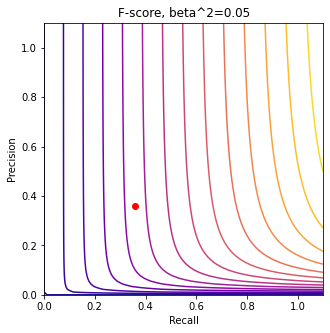

In [28]:
metric_func = lambda x, y: ((1+0.05) * x * y) / (0.05 * x + y)

f_idx = (metric_func(precision, recall)).argmax()

print(f'Precision:\t {precision[f_idx]}')
print(f'Recall: \t {recall[f_idx]}')
print(f'Threshold:\t {thres[f_idx]}')
print(f'F-score: \t {metric_func(precision, recall)[f_idx]}')

level_lines(metric_func, 'F-score, beta^2=0.05')
plt.plot(recall[min_idx], precision[min_idx], 'ro');

### Task 19. 

$beta^2=4$

Precision:	 0.2098922624877571
Recall: 	 0.8625477963372912
Threshold:	 0.10824820462524799
F-score: 	 0.5318145721659718


/tmp/ipykernel_125/3673235312.py:1: RuntimeWarning: invalid value encountered in true_divide
  metric_func = lambda x, y: ((1+4) * x * y) / (4 * x + y)


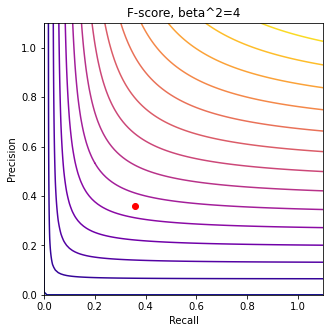

In [29]:
metric_func = lambda x, y: ((1+4) * x * y) / (4 * x + y)

f_idx = (metric_func(precision, recall)).argmax()

print(f'Precision:\t {precision[f_idx]}')
print(f'Recall: \t {recall[f_idx]}')
print(f'Threshold:\t {thres[f_idx]}')
print(f'F-score: \t {metric_func(precision, recall)[f_idx]}')

level_lines(metric_func, 'F-score, beta^2=4')
plt.plot(recall[min_idx], precision[min_idx], 'ro');